In [10]:
import pooch
import mrcfile
import matplotlib.pyplot as plt
import torch
from torch_find_peaks.find_peaks import find_peaks_2d
from torch_find_peaks.refine_peaks import refine_peaks_2d

In [2]:
mip = pooch.retrieve("https://ftp.ebi.ac.uk/empiar/world_availability/11544/data/scaled_mips/136_Sep13_10.27.07_231_1_scaled_mip_29_0.mrc",known_hash=None)

In [3]:
with mrcfile.open(mip) as mrc:
    mip_tensor = torch.tensor(mrc.data[0])

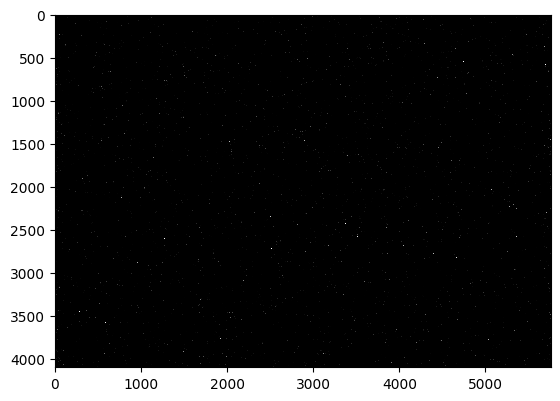

In [4]:
plt.imshow(mip_tensor, cmap='gray',interpolation='none',vmax=8.0,vmin=6.0)

In [62]:
peak_data = find_peaks_2d(mip_tensor-float(mip_tensor.median()), 
                          threshold_abs=7.6-float(mip_tensor.median()), 
                          min_distance=5,
                          return_as='dataframe')

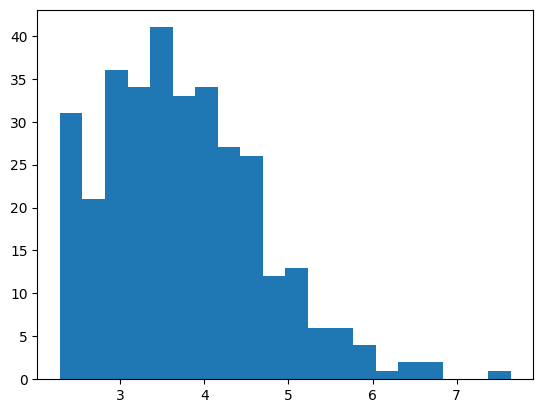

In [63]:
plt.hist(peak_data['height'], bins=20)
pass

In [64]:
refined_peaks = refine_peaks_2d(mip_tensor-mip_tensor.median(),
                                peak_coords=peak_data,
                                boxsize=6,
                                learning_rate=0.1,
                                sigma_x=1.5,
                                sigma_y=1.5,
                                return_as='dataframe')

(array([ 3., 13., 21., 27., 38., 40., 36., 32., 31., 31., 23.,  6., 12.,
         4.,  4.,  3.,  3.,  1.,  1.,  1.]),
 array([ 7.25453329,  7.53774309,  7.82095337,  8.10416317,  8.38737297,
         8.67058277,  8.95379257,  9.23700237,  9.52021217,  9.80342293,
        10.08663273, 10.36984253, 10.65305233, 10.93626213, 11.21947193,
        11.50268173, 11.78589249, 12.06910133, 12.35231209, 12.63552189,
        12.91873169]),
 <BarContainer object of 20 artists>)

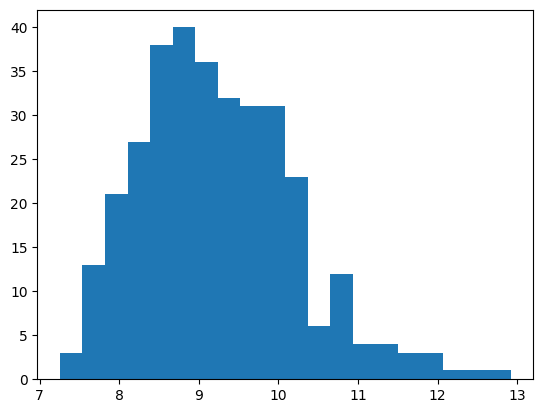

In [65]:
plt.hist(refined_peaks['amplitude'].to_numpy()+float(mip_tensor.median()), bins=20)

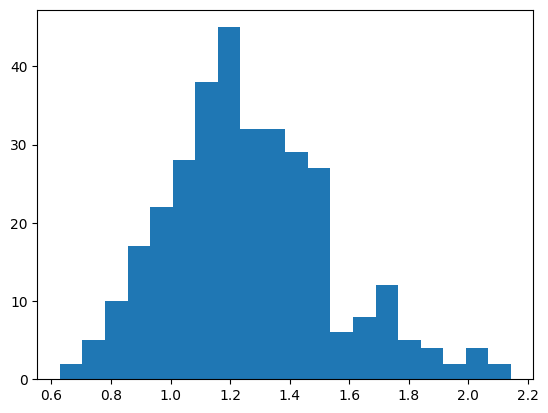

In [73]:
plt.hist(refined_peaks['sigma_x'], bins=20)
pass

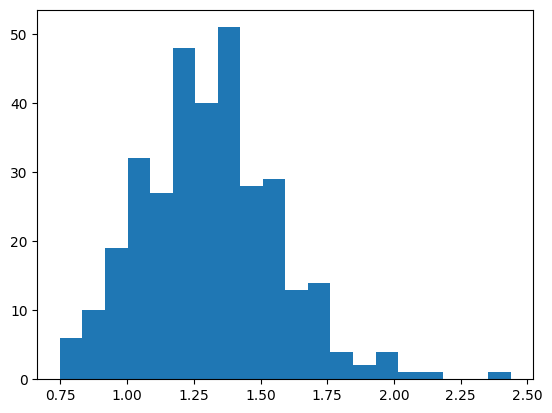

In [70]:
plt.hist(refined_peaks['sigma_y'], bins=20)
pass

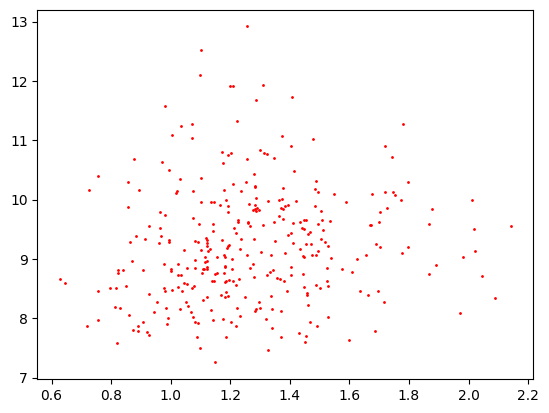

In [71]:
plt.plot(refined_peaks['sigma_x'], refined_peaks['amplitude'].to_numpy()+float(mip_tensor.median()), 'ro', markersize=1)
pass

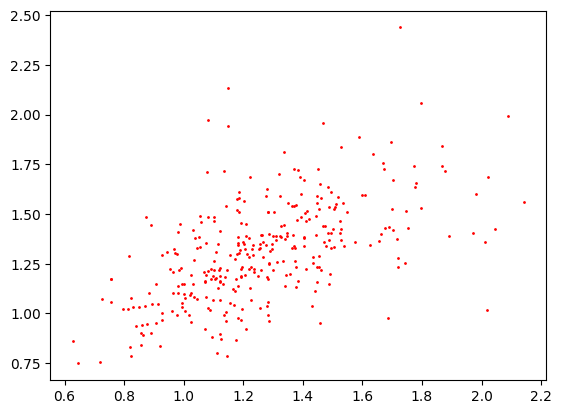

In [72]:
plt.plot(refined_peaks['sigma_x'], refined_peaks['sigma_y'], 'ro', markersize=1)
pass